<a href="https://colab.research.google.com/github/VeePollux/Calculo_Numerico_Computacional/blob/main/Relat%C3%B3rio2_Vanessa_Aldrighi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Relatório 2

##Imports

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from sympy.plotting.plot import PlotGrid

##Métodos

###Eliminação de Gauss

In [ ]:
def eliminGauss(A, b, n):
  matriz = np.copy(A)
  vetor = np.copy(b)
  Det = 1
  Info = 0
  for j in range(0,n-1):
    p = j
    Amax = abs(matriz[j][j])
    for k in range(j+1, n):
      if(abs(matriz[k][j])>Amax):
        Amax = abs(matriz[k][j])
        p = k
    if(p != j):
      for k in range(0, n):
        t = matriz[j][k]
        matriz[j][k] = matriz[p][k]
        matriz[p][k] = t
      t = vetor[j]
      vetor[j] = vetor[p]
      vetor[p] = t
      Det = - Det
    Det = Det * matriz[j][j]
    #Eliminção de gauss
    if(abs(matriz[j][j])!= 0):
      r = round(1/(matriz[j][j]),3)
      for i in range(j+1, n):
        Mult = round(matriz[i][j]*r,3)
        matriz[i][j] = 0
        for k in range(j+1, n):
          matriz[i][k] = round(matriz[i][k] - Mult*matriz[j][k], 3)
        vetor[i]= round(vetor[i]-Mult*vetor[j], 3)
    else:
      if(Info == 0 ):
        Info = j
  Det = round(Det* matriz[n-1][n-1], 3)
  if(Info == 0 and abs(matriz[n-1][n-1] == 0)):
    Info = n
  Solve = np.linalg.solve(matriz, vetor)
  return matriz, Det, vetor, Solve

####Eliminação de Gauss sem Arredondamento

In [ ]:
def eliminGaussSemArr(A, b, n):
  matriz = np.copy(A)
  vetor = np.copy(b)
  Det = 1
  Info = 0
  for j in range(0,n-1):
    p = j
    Amax = abs(matriz[j][j])
    for k in range(j+1, n):
      if(abs(matriz[k][j])>Amax):
        Amax = abs(matriz[k][j])
        p = k
    if(p != j):
      for k in range(0, n):
        t = matriz[j][k]
        matriz[j][k] = matriz[p][k]
        matriz[p][k] = t
      t = vetor[j]
      vetor[j] = vetor[p]
      vetor[p] = t
      Det = - Det
    Det = Det * matriz[j][j]
    #Eliminção de gauss
    if(abs(matriz[j][j])!= 0):
      r = 1/(matriz[j][j])
      for i in range(j+1, n):
        Mult = matriz[i][j]*r
        matriz[i][j] = 0
        for k in range(j+1, n):
          matriz[i][k] = matriz[i][k] - Mult*matriz[j][k]
        vetor[i]=vetor[i]-Mult*vetor[j]
    else:
      if(Info == 0 ):
        Info = j
  Det = Det* matriz[n-1][n-1]
  if(Info == 0 and abs(matriz[n-1][n-1] == 0)):
    Info = n
  Solve = np.linalg.solve(matriz, vetor)
  return matriz, Det, vetor, Solve

###Fatoração LU

In [ ]:
#Tentei fazer pelo exemplo do livro no entanto os resultados não estavam batendo
#Então fiz pelo passo a passo que achei mais simples de entender do que o algoritmo do livro

def fatLU(A, b, n):
  L = np.eye(n)  #L começa com apenas 1s na diagonal
  U = np.copy(A)
  for i in range(n-1):
    for j in range(i+1, n):
      L[j][i] = U[j][i]/U[i][i]  #Vai atualizando as colunas de L, ele se tornará triangular inferior
      for k in range(i, n):
        U[j][k] = U[j][k] - (L[j][i] * U[i][k]) #Atualizando o U, ele se tornará triangular superior

  x = np.linalg.solve(L, b)
  y = np.linalg.solve(U, x) #Juntando as duas matrizes com o vetor para chegar na solução final

  return L, U, y

###Fatoração Cholesky

In [ ]:
def fatCholesky(n, A):
  Z = np.zeros(shape = (n,n))
  Det = 1
  Info = 0
  for j in range(0, n):
    Soma = 0
    for k in range(0, j-1):
      Soma = Soma + A[j][k]*A[j][k]
    t = A[j][j] - Soma
    if(t > 0):
      t2 = Z[j][j] - Soma
      A[j][j]= math.sqrt(t)
      Z[j][j] = A[j][j]
      r = 1/(A[j][j])
      Det = Det * t2
    else:
      Info = j
      print("Matriz não é definida positiva.\n")
      return "-" , "-", Info
    for i in range(j+1, n):
      Soma = 0
      for k in range(0, j-1):
        Soma = Soma + A[i][k]*A[j][k]
      A[i][j] = (A[i][j]-Soma)*r
      Z[i][j] = A[i][j]

  return Det, Z, Info

###Gauss-Jacobi

In [ ]:
def gaussJacobi(n, A, b, Toler, IterMax):
  x = np.zeros(n)
  v = np.zeros(n)
  for i in range(0, n):
    x[i] =float( b[i]/A[i][i])
  Iter = 0
  while True:
    Iter = Iter + 1
    for i in range(0,n):
      Soma = 0
      for j in range(0,n):
        if(i != j):
          Soma = Soma + A[i][j]*x[j]
      v[i] =(b[i]- Soma)/A[i][i]
    NormaNum = 0
    NormaDen = 0
    for i in range(0, n):
      t = abs(v[i]-x[i])
      if(t>NormaNum):
        NormaNum = t
      if(abs(v[i])>NormaDen):
        NormaDen = abs(v[i])
      x[i] = v[i]
    NormaRel = NormaNum/NormaDen
    #print("Iter: ", Iter, "\nx: ", x, "\nNormaRel: ", NormaRel)
    #Teste de convergencia
    if(NormaRel <= Toler or Iter >= IterMax):
      break
  if(NormaRel <= Toler):
    Info = 0
  else:
    Info = 1
  return Info, Iter, x

###Gauss-Seidel

In [ ]:
def gaussSeidel(n, A, b, Toler, IterMax):
  x = np.zeros(n)
  v = np.zeros(n)
  for i in range(0,n):
    x[i]=b[i]/A[i][i]
  Iter = 0
  while True:
    Iter = Iter +1
    NormaNum = 0
    NormaDen = 0
    for i in range(0, n):
      Soma = 0
      for j in range(0, n):
        if(i != j):
          Soma = Soma + A[i][j]*x[j]
      v[i]=x[i]
      x[i]=(b[i]-Soma)/A[i][i]
      t = abs(v[i]-x[i])
      if(t> NormaNum):
        NormaNum = t
      if(abs(x[i])>NormaDen):
        NormaDen = abs(x[i])
    NormaRel = NormaNum/NormaDen
   # print("Iter: ", Iter, "\nx: ", x, "\nNormaRel: ", NormaRel)
    #Teste de convergencia
    if(NormaRel <= Toler or Iter >= IterMax):
      break
  if(NormaRel <= Toler):
    Info = 0
  else:
    Info = 1
  return Info, Iter, x

###Função Gráfico

In [ ]:
def graf(f1, f2, curva1, curva2):
  valores = [f1(valor) for valor in curva1]
  plt.plot(curva1, valores, linestyle = '-')
  valores = [f2(valor) for valor in curva2]
  plt.plot(curva2, valores, 'r')
  plt.title('Gráfico da Função')
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.axhline(y = 0, color = "black", linestyle = "-")
  plt.grid()
  plt.show()

##Questões

###Questão 1

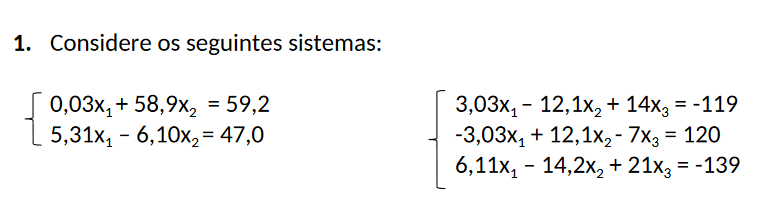

a) Resolva os sistemas acima usando o Métodos Direto de Eliminação de Gauss com
Pivotamento e operações aritméticas com aproximação de três dígitos por
arredondamento.

b) Verifique se os sistemas acima são convergente se aplicarmos os Métodos Iterativos de Gauss-Jacobi e Gauss-Seidel. Justifique sua resposta.

**Respostas**

A) Os sistemas resolvidos através do método de eliminação de Gauss com arredondamento de 3 números significativos obtiveram resultados satisfatórios.

B) Tanto método de Gauss-Seidel como de Jacobi não convergem, isso se dá pelo fato de ambas as matrizes da questão não possuirem diagonal dominante, ou seja, não passam no critério de linhas e/ou colunas.
No caso das duas matrizes, ambas não passam no critério de linhas e colunas.

In [ ]:
print("Questão 1A\nPRIMEIRO SISTEMA\n")
matriz1Q1 = np.array([[0.03, 58.9], [5.31, -6.10]], float) #-75
vetor1Q1 = np.array([59.2, 47.0], float)
print("Matriz original: \n", matriz1Q1, "\nVetor original: ", vetor1Q1)
print("Solução original:" , np.linalg.solve(matriz1Q1, vetor1Q1))

print("\nSistema resolvido por eliminação de gauss:\n")
matriz, Det, vetor, Solve = eliminGauss(matriz1Q1, vetor1Q1, 2)
print("Matriz: \n", matriz, "\nDeterminante: ", Det, "\nVetor: ", vetor, "\nSolução: ", Solve)

print("\nSEGUNDO SISTEMA\n")
matriz2Q1 = np.array([[3.03, -12.1, 14], [-3.03, 12.1, -7], [6.11, -14.2, 21]], float) #-75
vetor2Q1 = np.array([-119, 120, -139], float)
print("Matriz original: \n", matriz2Q1, "\nVetor original: ", vetor2Q1)
print("Solução original:" , np.linalg.solve(matriz2Q1, vetor2Q1))

print("\nSistema resolvido por eliminação de gauss:\n")
matriz, Det, vetor, Solve = eliminGauss(matriz2Q1, vetor2Q1, 3)
print("Matriz: \n", matriz, "\nDeterminante: ", Det, "\nVetor: ", vetor, "\nSolução: ", Solve)

Questão 1A
PRIMEIRO SISTEMA

Matriz original: 
 [[ 3.00e-02  5.89e+01]
 [ 5.31e+00 -6.10e+00]] 
Vetor original:  [59.2 47. ]
Solução original: [10.  1.]

Sistema resolvido por eliminação de gauss:

Matriz: 
 [[ 5.31  -6.1  ]
 [ 0.    58.937]] 
Determinante:  -312.955 
Vetor:  [47.    58.918] 
Solução:  [9.99962966 0.99967762]

SEGUNDO SISTEMA

Matriz original: 
 [[  3.03 -12.1   14.  ]
 [ -3.03  12.1   -7.  ]
 [  6.11 -14.2   21.  ]] 
Vetor original:  [-119.  120. -139.]
Solução original: [ 0.         10.          0.14285714]

Sistema resolvido por eliminação de gauss:

Matriz: 
 [[  6.11  -14.2    21.   ]
 [  0.      5.043   3.437]
 [  0.      0.      6.997]] 
Determinante:  -215.597 
Vetor:  [-139.      50.917    0.949] 
Solução:  [ 0.03444578 10.0041327   0.13562956]


In [ ]:
print("Questão 1B\nPRIMEIRO SISTEMA")

print("\nGaussSeidel")
Info, Iter, Sol = gaussSeidel(2, matriz1Q1, vetor1Q1, 0.005, 50)
print("Informação da matriz (0 - convergiu | 1 - ñ convergiu): ", Info, "\nIterações: ", Iter, "\nSolução: ", Sol)

print("\nGaussJacobi")
Info, Iter, Sol = gaussJacobi(2, matriz1Q1, vetor1Q1, 0.005, 50)
print("Informação da matriz (0 - convergiu | 1 - ñ convergiu): ", Info, "\nIterações: ", Iter, "\nSolução: ", Sol)

print("\nSEGUNDO SISTEMA")

print("\nGaussSeidel")
Info, Iter, Sol = gaussSeidel(3, matriz2Q1, vetor2Q1, 0.005, 50)
print("Informação da matriz (0 - convergiu | 1 - ñ convergiu): ", Info, "\nIterações: ", Iter, "\nSolução: ", Sol)

print("\nGaussJacobi")
Info, Iter, Sol = gaussJacobi(3, matriz2Q1, vetor2Q1, 0.005, 50)
print("Informação da matriz (0 - convergiu | 1 - ñ convergiu): ", Info, "\nIterações: ", Iter, "\nSolução: ", Sol)


Questão 1B
PRIMEIRO SISTEMA

GaussSeidel
Informação da matriz (0 - convergiu | 1 - ñ convergiu):  1 
Iterações:  50 
Solução:  [-4.34446504e+162 -3.78182121e+162]

GaussJacobi
Informação da matriz (0 - convergiu | 1 - ñ convergiu):  1 
Iterações:  50 
Solução:  [-1.29408318e+84  5.73763397e+81]

SEGUNDO SISTEMA

GaussSeidel
Informação da matriz (0 - convergiu | 1 - ñ convergiu):  1 
Iterações:  50 
Solução:  [ 1.57363432e+10  2.94842787e+09 -2.58482767e+09]

GaussJacobi
Informação da matriz (0 - convergiu | 1 - ñ convergiu):  1 
Iterações:  50 
Solução:  [-1.09093011e+15  2.22898082e+14 -2.49808803e+14]


##Questão 2

Uma indústria produz 4 tipo de produtos (1), (2), (3) e (4), os quais são processados e produzidos no decorrer da semana. Para produção de cada unidade desses produtos necessita-se de 4 diferentes tipos de matéria-prima (A), (B), (C) e (D), conforme tabela dada:


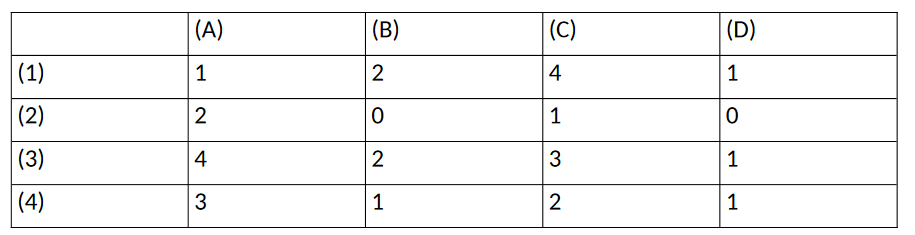


Por exemplo, para produzir uma unidade de (1) precisa-se de 1 unidade de A, 2
unidades de (B), 4 unidades de (C) e 1 unidade de (D).

A indústria possui disponível em estoque 16, 13, 27 e 7 unidades de (A), (B), (C) e (D), respectivamente. Quantas unidades de cada produto podem ser produzidas?

Formule um modelo matemático, resolva-o usando o Método Direto de Fatoração LU e
analise os resultados obtidos.


**Respostas**

Achei essa uma das questões mais difíceis, não consegui resolvê-la pelo algoritmo de fatoração LU do livro e precisei ir mais a fundo sobre o método, que é relativamente fácil de implementar. No entanto, acredito que tenha chegado em uma resposta satisfatória.


\begin{align}
 \text{Quantidade de produto 1 - 5 }\\
 \text{Quantidade de produto 2 - 2 } \\
 \text{Quantidade de produto 3 - 1 }\\
 \text{Quantidade de produto 4 - 1 }\\
\end{align}



Para o sistema, resolvi pensando em cada linha representando um item (A, B, C ou D), e os P's representam os produtos que serão gerados com esses itens.

\begin{align}
        \begin{cases}
            1p1 + 2p2 + 4p3 + 3p4 = 16 \\
            2p1 + 0p2 + 2p3 + 1p4 = 13 \\
            4p1 + 1p2 + 3p3 + 2p4 = 27 \\
            1p4 + 0p2 + 1p3 + 1p4 = 7\\
        \end{cases}
    \end{align}



In [ ]:
matriz1Q2 = np.array([[1, 2, 4, 3], [2, 0, 2, 1], [4, 1, 3, 2], [1, 0, 1, 1]], float) #Matriz de quantidade de itens
print("Matriz original: \n", matriz1Q2)
vetor1Q2 = np.array([16, 13, 27, 7],float)
print("Vetor original: ", vetor1Q2)
Solve = np.linalg.solve(matriz1Q2, vetor1Q2)
print("Solução original:" , Solve)

matrizL, matrizU, result = fatLU(matriz1Q2, vetor1Q2, 4)
print("\nResultados com LU: \nInferior(L): \n", matrizL, "\nSuperior (U): \n", matrizU, "\nResultado: ", result)


Matriz original: 
 [[1. 2. 4. 3.]
 [2. 0. 2. 1.]
 [4. 1. 3. 2.]
 [1. 0. 1. 1.]]
Vetor original:  [16. 13. 27.  7.]
Solução original: [5. 2. 1. 1.]

Resultados com LU: 
Inferior(L): 
 [[ 1.    0.    0.    0.  ]
 [ 2.    1.    0.    0.  ]
 [ 4.    1.75  1.    0.  ]
 [ 1.    0.5  -0.    1.  ]] 
Superior (U): 
 [[ 1.    2.    4.    3.  ]
 [ 0.   -4.   -6.   -5.  ]
 [ 0.    0.   -2.5  -1.25]
 [ 0.    0.    0.    0.5 ]] 
Resultado:  [5. 2. 1. 1.]


##Questão 3

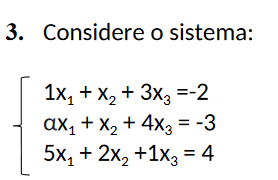

Para os valores de α:
\begin{align}
        \begin{cases}
          1x1 +x2 +3x3 = -2\\
          ax1 + x2 + 4x3 = -3\\
          5x1 +2x2 +1x3 = 4\\
        \end{cases}
    \end{align}

\\

a) A matriz A pode ser decomposta em L.U? Justifique.

b) O sistema pode ser resolvido por Fatoração Cholesky? Justifique.

c) Considere α = 1 e resolva o sistema pelo Método de Eliminação de Gauss.

**Respostas**

A) Pode, desde que o valor α não transforme a matriz em uma matriz singular, ou seja, com determinante igual a 0. Neste caso, α deve ser diferente de 2/5.

B) Não pode ser aplicado, principalmente pelo fato de não ser uma matriz simétrica, ou seja, uma matriz igual a sua transposta. Além disso é necessário verificar se a matriz é positiva definida através de um vetor escolhido e cálculos, no entanto, vendo que ela não é simétrica já de início não precisamos verificar isso.

In [ ]:
matriz1Q3 = np.array([[1, 1, 3], [1, 1, 4], [5, 2, 1]], float)
vetor1Q3 = np.array([2, -3, 4], float)
print("Matriz original: \n", matriz1Q3, "\nVetor original: ", vetor1Q3)
print("Solução original:" , np.linalg.solve(matriz1Q3, vetor1Q3))

print("\n3.B) Sistema resolvido por cholesky com α = 1:")
Det, Matriz, Info = fatCholesky(3, matriz1Q3)
print("Matriz: \n", Matriz,"\nInformação (0 - definida positiva): ", Info,"\nDeterminante: ", Det)

print("\n3.C) Sistema resolvido por eliminação de gauss:")
matriz, Det, vetor, Solve = eliminGauss(matriz1Q3, vetor1Q3, 3)
print("Matriz: \n", matriz, "\nDeterminante: ", Det, "\nVetor: ", vetor, "\nSolução: ", Solve)

Matriz original: 
 [[1. 1. 3.]
 [1. 1. 4.]
 [5. 2. 1.]] 
Vetor original:  [ 2. -3.  4.]
Solução original: [-8.33333333 25.33333333 -5.        ]

3.B) Sistema resolvido por cholesky com α = 1:
Matriz não é definida positiva.

Matriz: 
 - 
Informação (0 - definida positiva):  2 
Determinante:  -

3.C) Sistema resolvido por eliminação de gauss:
Matriz: 
 [[ 5.   2.   1. ]
 [ 0.   0.6  3.8]
 [ 0.   0.  -1. ]] 
Determinante:  3.0 
Vetor:  [ 4.  -3.8  5. ] 
Solução:  [-8.33333333 25.33333333 -5.        ]


##Questão 4

Uma equipe de três paraquedistas ligados por uma corda de peso desprezável é
lançada em queda livre a uma velocidade v = 5 m/s.

Considere os seguintes dados:

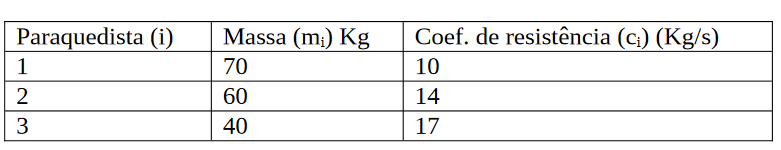

O sistema linear resultante permite calcular a tensão em cada secção da corda (R e T ) e a aceleração da equipe (a).
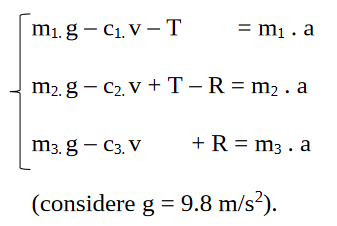


\begin{align}
        \begin{cases}
            -70.a - T = -636 \\
            -60.a + T - R = -518 \\
            -40.a + R = -307\\
        \end{cases}
    \end{align}

O que poderia dizer acerca da convergência do método iterativo de Gauss-Seidel
quando aplicado ao sistema? Justifique.

**Resposta**

O método de Gauss-Seidel consegue convergir de forma relativamente lenta, com 31 iterações. Apesar do fato deste método utilizar sempre valores mais atualizados em seus cálculos e apresenta maior quantidade de critérios que o permitem atingir a convergência ainda sim este método não consegue lidar bem com sistemas mal condicionados, resultando em uma convergencia lenta. Um dos métodos que lida melhor com isso é o por fatoração LU com bons ajustes de para o sistema em questão.

In [ ]:
# a / t / r
matriz1Q4 = np.array([[70, 1, 0], [60, -1, 1], [40, 0, -1]])
vetor1Q4 = np.array([636, 518, 307])
print("Matriz original: \n", matriz1Q4, "\nVetor original: ", vetor1Q4)

Info, Iter, Sol = gaussSeidel(3, matriz1Q4, vetor1Q4, 0.005, 50)
print("Informação da matriz (0 - convergiu | 1 - ñ convergiu): ", Info, "\nIterações: ", Iter, "\nSolução: ", Sol)



Matriz original: 
 [[70  1  0]
 [60 -1  1]
 [40  0 -1]] 
Vetor original:  [636 518 307]
Informação da matriz (0 - convergiu | 1 - ñ convergiu):  0 
Iterações:  31 
Solução:  [ 8.59321583 34.45607699 36.72863332]


##Questão 5

Resolva o seguinte sistema de equações :

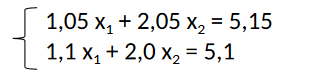

a) Graficamente.

b) Por Eliminação de Gauss com Pivotamento Parcial, de modo exato.

c) Por Eliminação de Gauss com Pivotamento Parcial, mas com três algarismos
significativos, utilizando arredondamento.

d) Justifique os resultados obtidos.

**Respotas**

D) Neste exemplo, utilizar ou não o arredondamento praticamente não faz diferença na solução final. Mas, se tivermos uma matriz com valores discrepantes entre si pode haver uma diferença significante. Isso se dá por poder ter divisões por números muito pequenos e/ou erros que se propagam durante as operações da eliminação de Gauss.


5.A)



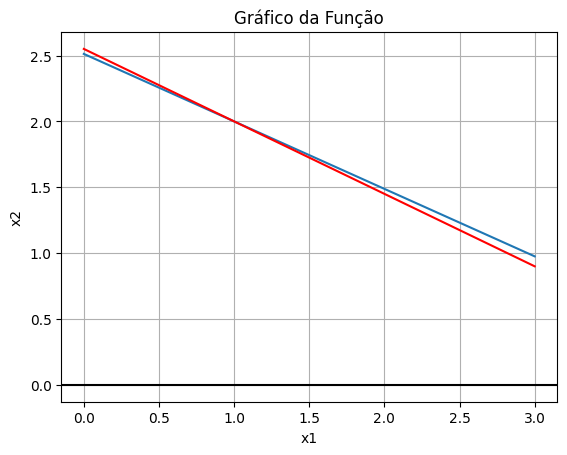

In [ ]:
print("5.A)\n")
f1Q5 = lambda x1: (-1.05*x1 + 5.15)/2.05
f2Q5 = lambda x1: (-1.1*x1 + 5.1)/2
curva1Q5 = np.linspace(3, 0, 1000)
curva2Q5 = np.linspace(3, 0, 1000)
graf(f1Q5, f2Q5, curva1Q5, curva2Q5)

In [ ]:
matriz1Q5 = np.array([[1.05, 2.05], [1.1, 2.0]],float)
vetor1Q5 = np.array([5.15, 5.1], float)
print("Matriz original: \n", matriz1Q5, "\nVetor original: ", vetor1Q5)

print("\n5.b) Sem Arredondamento")
matriz, Det, vetor, Solve = eliminGaussSemArr(matriz1Q5, vetor1Q5, 2)
print("Matriz: \n", matriz,  "\nVetor: ", vetor,"\nDeterminante: ", Det, "\nSolução: ", Solve)

print("\n5.c) Com Arredondamento")
matriz, Det, vetor, Solve = eliminGauss(matriz1Q5, vetor1Q5, 2)
print("Matriz: \n", matriz,  "\nVetor: ", vetor,"\nDeterminante: ", Det, "\nSolução: ", Solve)


Matriz original: 
 [[1.05 2.05]
 [1.1  2.  ]] 
Vetor original:  [5.15 5.1 ]

5.b) Sem Arredondamento
Matriz: 
 [[1.1        2.        ]
 [0.         0.14090909]] 
Vetor:  [5.1        0.28181818] 
Determinante:  -0.15499999999999972 
Solução:  [1. 2.]

5.c) Com Arredondamento
Matriz: 
 [[1.1   2.   ]
 [0.    0.142]] 
Vetor:  [5.1   0.285] 
Determinante:  -0.156 
Solução:  [0.9871959  2.00704225]
